In this session we have run different metrices on different regression model we have compare those models and their performance on different scales

In [19]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,root_mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df = pd.read_csv('AmazonSalesData.csv')
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02


In [3]:
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [6]:
X = df[['Units Sold','Unit Price','Unit Cost','Total Revenue','Total Cost']]
y = df['Total Profit']

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

models = [LinearRegression(),KNeighborsRegressor(),DecisionTreeRegressor(),SVR(),RandomForestRegressor()]
model_names = ["LinearRegression","KNeighborsRegressor","DecisionTreeRegressor","SVR","RandomForestRegressor"]

models_score = []

for model,model_names in zip(models,model_names):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    r2sr = r2_score(y_test,y_pred)
    models_score.append([model_names,r2sr])
    
models_score = sorted(models_score, key=lambda x:x[1] , reverse=True)

for model in models_score:
    print(f"R2 score  {model[0]} : {model[1]:.2f}")

R2 score  LinearRegression : 1.00
R2 score  RandomForestRegressor : 0.93
R2 score  DecisionTreeRegressor : 0.92
R2 score  KNeighborsRegressor : 0.75
R2 score  SVR : -0.36


In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

models = [LinearRegression(),KNeighborsRegressor(),DecisionTreeRegressor(),SVR(),RandomForestRegressor()]
model_names = ["LinearRegression","KNeighborsRegressor","DecisionTreeRegressor","SVR","RandomForestRegressor"]

models_score = []

for model,model_names in zip(models,model_names):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    MSE = mean_squared_error(y_test,y_pred)
    models_score.append([model_names,MSE])
    
models_score = sorted(models_score, key=lambda x:x[1] , reverse=True)

for model in models_score:
    print(f"MSE  {model[0]} : {model[1]:.2f}")

MSE  SVR : 228183616467.00
MSE  KNeighborsRegressor : 41877862442.49
MSE  DecisionTreeRegressor : 10103815571.44
MSE  RandomForestRegressor : 8917947702.52
MSE  LinearRegression : 0.00


In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

models = [LinearRegression(),KNeighborsRegressor(),DecisionTreeRegressor(),SVR(),RandomForestRegressor()]
model_names = ["LinearRegression","KNeighborsRegressor","DecisionTreeRegressor","SVR","RandomForestRegressor"]

models_score = []

for model,model_names in zip(models,model_names):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    MAE = mean_absolute_error(y_test,y_pred)
    models_score.append([model_names,MAE])
    
models_score = sorted(models_score, key=lambda x:x[1] , reverse=True)

for model in models_score:
    print(f"MAE  {model[0]} : {model[1]:.2f}")

MAE  SVR : 358718.95
MAE  KNeighborsRegressor : 143109.55
MAE  DecisionTreeRegressor : 71530.31
MAE  RandomForestRegressor : 70923.91
MAE  LinearRegression : 0.00


In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

models = [LinearRegression(),KNeighborsRegressor(),DecisionTreeRegressor(),SVR(),RandomForestRegressor()]
model_names = ["LinearRegression","KNeighborsRegressor","DecisionTreeRegressor","SVR","RandomForestRegressor"]

models_score = []

for model,model_names in zip(models,model_names):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    RMSE = root_mean_squared_error(y_test,y_pred)
    models_score.append([model_names,r2sr])
    
models_score = sorted(models_score, key=lambda x:x[1] , reverse=True)

for model in models_score:
    print(f"R2 score  {model[0]} : {model[1]:.2f}")

R2 score  LinearRegression : 0.93
R2 score  KNeighborsRegressor : 0.93
R2 score  DecisionTreeRegressor : 0.93
R2 score  SVR : 0.93
R2 score  RandomForestRegressor : 0.93


___

Now enough of this evaluation let get into the main fight

Text(0, 0.5, 'Actual')

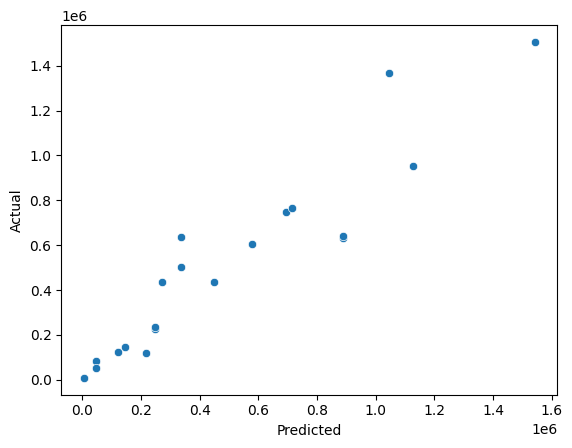

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

model = KNeighborsRegressor(n_neighbors=1)

model.fit(X_train,y_train)

y_pred=model.predict(X_test)

y_pred

sns.scatterplot(x=y_pred , y=y_test )
plt.xlabel('Predicted')
plt.ylabel('Actual')

___
**Linear regressor**

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train,y_train)

y_pred=model.predict([[1485	,154.06	,90.93	,228779.10,	135031.05]])

y_pred

c:\Users\khattak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([93748.05])

___
**Random forest regressor**

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)

model.fit(X_train,y_train)

y_pred=model.predict([[1485	,154.06	,90.93	,228779.10,	135031.05]])

y_pred

c:\Users\khattak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([91251.768])

___
**Dicision tree regressor**

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42)

model.fit(X_train,y_train)

y_pred=model.predict([[1485	,154.06	,90.93	,228779.10,	135031.05]])

y_pred

c:\Users\khattak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([93748.05])

___
**Support vector regressor (SVR)**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

model = SVR()

model.fit(X_train,y_train)

y_pred=model.predict([[1485	,154.06	,90.93	,228779.10,	135031.05]])

y_pred

c:\Users\khattak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


array([264179.41535023])

___